In [16]:
from call_of_func.utils.get_source_path import ROOT
import torch, json
from pathlib import Path

data_root = Path(ROOT / "data/processed")

labels = json.load(open(data_root / "labels.json"))
y_train = torch.load(data_root / "train_y.pt")
y_val   = torch.load(data_root / "val_y.pt")
y_test  = torch.load(data_root / "test_y.pt")

print("Num labels.json:", len(labels))
print("Max label train:", y_train.max().item())
print("Unique train labels:", torch.unique(y_train))
print("Max label val:", y_val.max().item())
print("Unique val labels:", torch.unique(y_val))
print("Max label test:", y_test.max().item())
print("Unique test labels:", torch.unique(y_test))

Num labels.json: 91
Max label train: 90
Unique train labels: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90])
Max label val: 90
Unique val labels: tensor([ 0,  1,  3,  4,  5,  6,  8,  9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90])
Max label test: 90
Unique test labels: tensor([ 0,  1,  2,  3,  4,  5,  6,  9, 10, 11, 12, 13, 14, 1

In [17]:
def class_hist(y):
    return torch.bincount(y, minlength=y.max()+1)

print("Train counts:", class_hist(y_train))
print("Val counts:  ", class_hist(y_val))
print("Test counts: ", class_hist(y_test))


Train counts: tensor([ 490,  262,  135,  462, 1219,  178,  546,   72,  159,  371,   98,  406,
         231,  777, 1288,  252,   73, 1565,  702,  233,  104,  494,   46, 1038,
         426,  492,   56,  638,  238,  521,  365,  395,  210,   53,  111,   43,
         806,  166,  781,  324,  831,  747,  147,  361,   79,  455,  378,   62,
         114,  164,   86,  156,  713,  109,  275,  674,  711,  169,   58,  544,
         423,  332,  477, 1006,  341,  603,  466,   97,  100,  522,  355,  393,
         327,  760,  430,  483,   52,  361,  770,   54,  960,   47, 1037,  291,
         713,  265,  333,  135,  189,  327,  715])
Val counts:   tensor([  9,  19,   0,  17,  16,   9,  14,   0,   8,  41,  24,   0,   5,  31,
         11,   0,  18, 112,  39,   7,   8,   3,   7,  17,  27,  12,   5,  12,
         21,   3,  15,   2,   3,   1,  10,  10,   5,   2,  29,  46,   9,  37,
         25,   7,   4,   5,  16,   4,   4,  28,  15,   7,  32,   2,   3, 107,
         54,  13,   8,  50,  15,  21,  17,   9,  

In [18]:
train_classes = set(torch.unique(y_train).tolist())
val_classes   = set(torch.unique(y_val).tolist())
test_classes  = set(torch.unique(y_test).tolist())

print("Val ⊆ Train:", val_classes.issubset(train_classes))
print("Test ⊆ Train:", test_classes.issubset(train_classes))


Val ⊆ Train: True
Test ⊆ Train: True


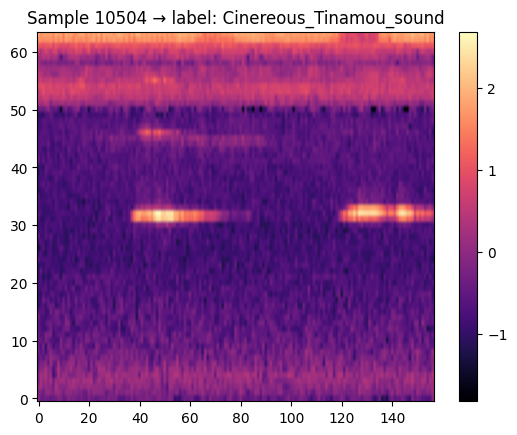

In [19]:
import random
import matplotlib.pyplot as plt

x_train = torch.load(data_root / "train_x.pt")

i = random.randint(0, len(y_train)-1)
label = labels[y_train[i]]
spec  = x_train[i, 0]

plt.imshow(spec, origin="lower", aspect="auto", cmap="magma")
plt.title(f"Sample {i} → label: {label}")
plt.colorbar()
plt.show()

In [20]:


train_g = set(json.load(open(data_root / "train_group.json")))
val_g   = set(json.load(open(data_root / "val_group.json")))
test_g  = set(json.load(open(data_root / "test_group.json")))

print("Train ∩ Val:", len(train_g & val_g))
print("Train ∩ Test:", len(train_g & test_g))
print("Val ∩ Test:", len(val_g & test_g))

Train ∩ Val: 0
Train ∩ Test: 0
Val ∩ Test: 0


In [21]:
assert y_train.min() == 0
assert y_train.max().item() + 1 == len(labels)
assert set(torch.unique(y_val).tolist()).issubset(set(torch.unique(y_train).tolist()))
assert set(torch.unique(y_test).tolist()).issubset(set(torch.unique(y_train).tolist()))

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()
print(f"Number of cores: {cores}, Number of threads: {2*cores}")


Number of cores: 10, Number of threads: 20
